In [157]:
#basic libraries
import numpy as np
import pandas as pd
import warnings 

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#ml
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn import metrics

In [158]:
#settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [159]:
#reading the csv
df = pd.read_csv('survey.csv')

In [160]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [162]:
df.describe(include="all", exclude = None).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1259,1246,2014-08-28 16:58:33,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1259,NaN,NaN,NaN,7.94281e+07,2.8183e+09,-1726,27,31,36,1e+11
Gender,1259,49,Male,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,1259,48,United States,751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,744,45,CA,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
self_employed,1241,2,No,1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
family_history,1259,2,No,767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
treatment,1259,2,Yes,637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_interfere,995,4,Sometimes,465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_employees,1259,6,6-25,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
all_columns = df.columns
for col in all_columns:
    text = ''
    for val in df[col].unique():
        text = text + ' ' + "'" +str(val) + "'"
    print(col,':', text)
    print('\n') 
    
    
 
        

Timestamp :  '2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' '2014-08-27 11:29:46' '2014-08-27 11:30:22' '2014-08-27 11:31:22' '2014-08-27 11:31:50' '2014-08-27 11:32:05' '2014-08-27 11:32:39' '2014-08-27 11:32:43' '2014-08-27 11:32:44' '2014-08-27 11:32:49' '2014-08-27 11:33:23' '2014-08-27 11:33:26' '2014-08-27 11:33:57' '2014-08-27 11:34:00' '2014-08-27 11:34:20' '2014-08-27 11:34:37' '2014-08-27 11:34:53' '2014-08-27 11:35:08' '2014-08-27 11:35:12' '2014-08-27 11:35:24' '2014-08-27 11:35:48' '2014-08-27 11:36:24' '2014-08-27 11:36:48' '2014-08-27 11:37:08' '2014-08-27 11:37:23' '2014-08-27 11:37:59' '2014-08-27 11:38:12' '2014-08-27 11:38:18' '2014-08-27 11:39:03' '2014-08-27 11:38:55' '2014-08-27 11:39:31' '2014-08-27 11:39:36' '2014-08-27 11:40:51' '2014-08-27 11:41:17' '2014-08-27 11:41:37' '2014-08-27 11:41:50' '2014-08-27 11:42:08' '2014-08-27 11:42:15' '2014-08-27 11:42:25' '2014-08-27 11:42:31' '2014-08-27 11:43:07' '2014-08-27 11:43:10' '2014-08-27 11:43:2

In [164]:
numerical_columns = [col for col in df.columns if df[col].dtypes != 'O' and col not in "treatment"]

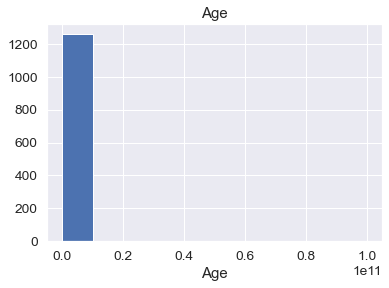

In [165]:
def hist_for_nums(data, numeric_cols):
    for col in numeric_cols:
        data[col].hist()
        plt.xlabel(col)
        plt.title(col)
        plt.show()

hist_for_nums(df, numerical_columns)
# the only numeric variable is age atm. because of outlier values histogram of age is like this;

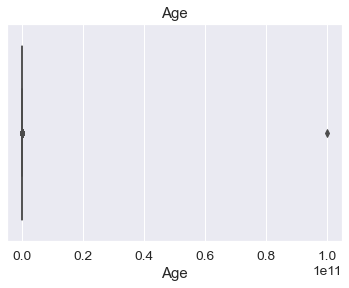

In [166]:
def boxplot_for_nums(data, numeric_cols):
    for col in numeric_cols:
        sns.boxplot(data[col])
        plt.xlabel(col)
        plt.title(col)
        plt.show()

boxplot_for_nums(df, numerical_columns)
# we absolutely have some outlier problems 🙂

## Data Preperation

In [167]:
print(df['Country'].value_counts())
print("\n \n")
print(df['state'].unique())
# most of them is U.S., so it wont help us.

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Italy                       7
Switzerland                 7
Sweden                      7
Poland                      7
Belgium                     6
Brazil                      6
South Africa                6
Israel                      5
Bulgaria                    4
Singapore                   4
Austria                     3
Mexico                      3
Finland                     3
Russia                      3
Greece                      2
Croatia                     2
Denmark                     2
Colombia                    2
Portugal                    2
Czech Republic              1
China                       1
Thailand                    1
Romania                     1
Costa Rica

In [168]:
# Timestamp and comments are useless too. We are drooping these columns.
df.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

In [169]:
df['Age'].unique()
# age has absurd values, we will basicly remove them.

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [170]:
df.drop(df[df['Age'] < 0].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72],
      dtype=int64)

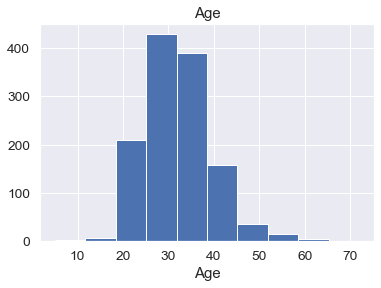

In [171]:
# age histogram after removing absurd values;
hist_for_nums(df, numerical_columns)

In [172]:
df['Gender'].unique()
# we have to fix this 😪

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [173]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()

# it's better 👌

Male      988
Female    247
Other      19
Name: Gender, dtype: int64

In [174]:
# work_interfere has null values, we will fill them with 'Unknown'
df['work_interfere'] = df['work_interfere'].fillna('Unknown')
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' 'Unknown']


In [175]:
# null self_employed values are probably no
df['self_employed'] = df['self_employed'].fillna('No')
print(df['self_employed'].unique())

['No' 'Yes']


In [176]:
df.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

## Encoding

In [177]:

object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

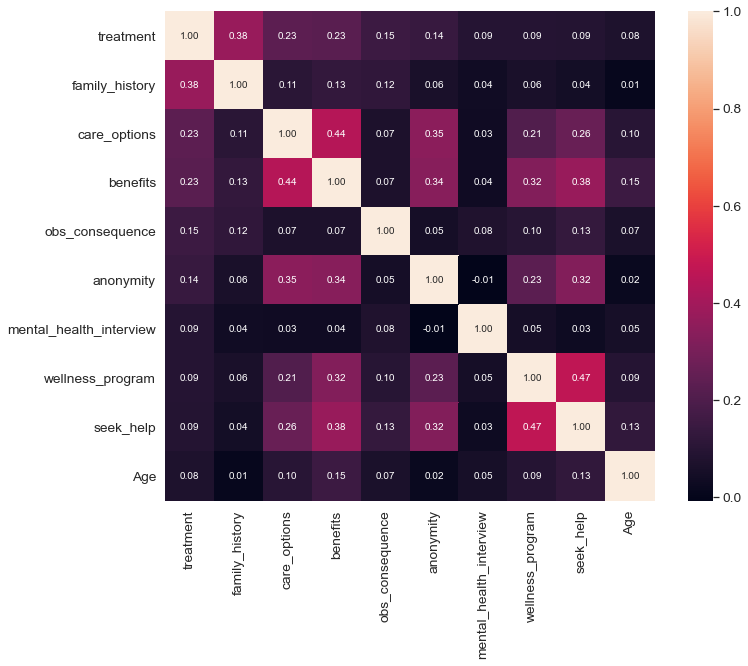

In [178]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))


#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [179]:
y = df["treatment"] # target variable is assigned to y
X = df.drop(["treatment"], axis=1) # control variables are assigned to X

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46) # 80% train, 20% test 

In [181]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('SVM', SVC(gamma='auto'))
         ] 

In [183]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    msg = "%s: (%f)" % (name, acc)
    print(msg)

LR: (0.705179)
KNN: (0.649402)
CART: (0.752988)
SVM: (0.737052)
